In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
crop_reco=pd.read_csv('datasets/crop_recommendation_v2.csv')
crop_reco

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2095,7,11,22,22.695834,71.466622,6.542159,223.521132,tapioca
2096,8,13,28,18.890846,66.112498,6.950368,230.118555,tapioca
2097,5,11,29,25.214670,73.922861,7.489826,229.897810,tapioca
2098,5,19,23,22.733908,64.597150,5.814361,201.006787,tapioca


In [7]:
hum_df=pd.read_csv('datasets/statewise_seasonwise_humidity.csv')
temp_df=pd.read_csv('datasets/statewise_seasonwise_temperature.csv')
rain_df=pd.read_csv('datasets/statewise_seasonwise_rainfall.csv')

In [9]:
#soil type - got from CNN model
soil='Black Soil'

In [10]:
#input from user
input_state="Maharashtra"
input_district="Satara"

input_N=50
input_P=50
input_K=50
input_pH=6.0

In [11]:
hum_input=hum_df[hum_df['state']==input_state]['annual_avg']
temp_input=hum_df[temp_df['state']==input_state]['annual_avg']
rain_input=hum_df[rain_df['state']==input_state]['annual_avg']

/var/folders/9p/s20qcdt565j49qt2_m5b682m0000gn/T/ipykernel_8458/345268757.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rain_input=hum_df[rain_df['state']==input_state]['annual_avg']


In [12]:
if input_N==0:
    pass
if input_P==0:
    pass
if input_K==0:
    pass
if input_pH==0:
    pass

### KNN Model

In [33]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [25]:
X=crop_reco.drop('label', axis=1)
X


,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2095,7,11,22,22.695834,71.466622,6.542159,223.521132
2096,8,13,28,18.890846,66.112498,6.950368,230.118555
2097,5,11,29,25.214670,73.922861,7.489826,229.897810
2098,5,19,23,22.733908,64.597150,5.814361,201.006787


In [26]:
y=crop_reco['label']
y

0          rice
1          rice
2          rice
3          rice
4          rice
         ...   
2095    tapioca
2096    tapioca
2097    tapioca
2098    tapioca
2099    tapioca
Name: label, Length: 2100, dtype: object

In [27]:
#Scaling the data to between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)
X

,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.264286,0.190,0.345886,0.790267,0.457547,0.637133
1,0.607143,0.378571,0.180,0.371445,0.770633,0.580245,0.727144
2,0.428571,0.357143,0.195,0.406854,0.793977,0.764164,0.868719
3,0.528571,0.214286,0.175,0.506901,0.768751,0.567015,0.788650
4,0.557143,0.264286,0.185,0.324378,0.785626,0.715614,0.863987
...,...,...,...,...,...,...,...
2095,0.050000,0.042857,0.085,0.397998,0.667359,0.466529,0.715249
2096,0.057143,0.057143,0.115,0.288816,0.604901,0.560129,0.740285
2097,0.035714,0.042857,0.120,0.470275,0.696012,0.683823,0.739447
2098,0.035714,0.100000,0.090,0.399091,0.587224,0.299650,0.629814


In [28]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=0, test_size=0.2)

In [29]:
knn=KNeighborsClassifier(n_neighbors=5)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_predict=knn.predict(X_test)
y_correct=np.array(y_test)
print(np.concatenate((y_predict.reshape(len(y_predict), 1), y_correct.reshape(len(y_correct),1)),axis=1))

[['tapioca' 'tapioca']
 ['wheat' 'wheat']
 ['jute' 'jute']
 ['watermelon' 'watermelon']
 ['pomegranate' 'pomegranate']
 ['orange' 'orange']
 ['grapes' 'grapes']
 ['mango' 'mango']
 ['coconut' 'coconut']
 ['coffee' 'coffee']
 ['watermelon' 'watermelon']
 ['orange' 'orange']
 ['blackgram' 'blackgram']
 ['maize' 'maize']
 ['kidneybeans' 'kidneybeans']
 ['coconut' 'coconut']
 ['chickpea' 'chickpea']
 ['papaya' 'papaya']
 ['maize' 'maize']
 ['wheat' 'wheat']
 ['mungbean' 'mungbean']
 ['tapioca' 'tapioca']
 ['watermelon' 'watermelon']
 ['cotton' 'cotton']
 ['pomegranate' 'pomegranate']
 ['cotton' 'cotton']
 ['pomegranate' 'pomegranate']
 ['tapioca' 'tapioca']
 ['mungbean' 'mungbean']
 ['jute' 'jute']
 ['wheat' 'wheat']
 ['lentil' 'lentil']
 ['watermelon' 'watermelon']
 ['banana' 'banana']
 ['kidneybeans' 'kidneybeans']
 ['coffee' 'coffee']
 ['rice' 'rice']
 ['tapioca' 'tapioca']
 ['rice' 'rice']
 ['mungbean' 'mungbean']
 ['coconut' 'coconut']
 ['tapioca' 'tapioca']
 ['lentil' 'lentil']
 ['ju

/opt/homebrew/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


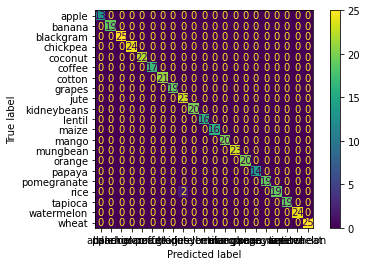

In [32]:
plot_confusion_matrix(knn, X_test, y_test)

In [35]:
accuracy_score(y_test, y_predict)

0.9952380952380953